# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4: Web Scraping Job Postings



In [1]:
%%html
<style>
div.input {
    display:none;
}
</style

<a id='top'></a>
<img src="https://s3.amazonaws.com/sr-marketplace-prod/wp-content/uploads/2015/08/indeed.jpg" style="float: left; margin: 20px; height: 55px">

### Question 1 Part 1 -  Web Scraping from Indeed

[Readme](readme.html)

In [22]:
import numpy as np
import pandas as pd
import matplotlib
import warnings
warnings.filterwarnings('ignore') 
from IPython.display import HTML
import proj_lib

pd.set_option("display.max_rows", 10)      # Make data extracts smaller for online consumption
pd.options.mode.chained_assignment = None  # Suppress warnings for online consumption

%matplotlib inline
%config InlineBackend.figure_format ='retina'

proj_lib.jupyterlink('proj_lib.py')

Click below to view/edit the file::
http://localhost:8888/edit/Documents/GitHub/materials/projects/project-4/proj_lib.py


<a id='web'></a>
### Web Scraping
<img src="http://blog.website-scraping.com/wp-content/uploads/web-data-scraping-300x180.png" style="float: left; margin: 50px; height: 200px">


Question 1
- [Top Section](#top)
- [Web Scraping](#web)
- [Data Loading](#dataload)
- [EDA](#eda)
- [Features Engineering](#feng)
- [Model Preparation](#prep)
- [Modeling Process](#model)
- [Salary Extrapolation](#extrapolate)
<br><br>
- [Question 2](#qn2)

In [23]:
# can skip this since web scraping already done, the data file already saved.
# download folder for scrapped files saved into ./indeed/ folder
# input file  :  ./indeed/indeed_pgNNN.txt
# output file :  indeed_df.csv

%run imports.py https://www.indeed.com/jobs?q=data+scientist&start={}
#%run imports.py https://www.indeed.com/jobs?q=data+engineer&start={}
#%run imports.py https://www.indeed.com/jobs?q=data+analyst&start={}
#%run imports.py https://www.indeed.com/jobs?q=business+intelligence&start={}
#%run imports.py https://www.indeed.com/jobs?q=data+architect&start={}


##################################################################
# Review
# 
# indeed US job site works differently from mycareersfuture.sg
# it does not have skillset , job level filtering
# very raw and basic information such location, company , summary
# majority of the jobs has no salary range indicated
# some companies hiring for a few positions in one posting.
#
# technically, basic regular expression without selenium/soup/xcode works
# but the code is super long and higher chance of getting buggy.
# Coding with soup+selenium is sufficient, 

proj_lib.jupyterlink('imports.py')
proj_lib.jupyterlink('indeed_df.csv')


https://www.indeed.com/jobs?q=data+scientist&start={}
Last page url :
https://www.indeed.com/jobs?q=data+scientist&start=990
verifying the files...
Finished verifying soup files
data file exists, loading it now
./indeed/indeed_pg0.txt
./indeed/indeed_pg100.txt
./indeed/indeed_pg200.txt
./indeed/indeed_pg300.txt
./indeed/indeed_pg400.txt
./indeed/indeed_pg500.txt
./indeed/indeed_pg600.txt
./indeed/indeed_pg700.txt
./indeed/indeed_pg800.txt
./indeed/indeed_pg900.txt
Finished processing
File have been saved as indeed_df.csv
Click below to view/edit the file::
http://localhost:8888/edit/Documents/GitHub/materials/projects/project-4/imports.py
Click below to view/edit the file::
http://localhost:8888/edit/Documents/GitHub/materials/projects/project-4/indeed_df.csv


In [24]:
# Data Structures
# Title - job title
# Company - name of company
# City - name of city , state code(optional)
# Salary - estimated salary range and type
# Summary - job description
proj_lib.master_df.head()

,Title,Company,City,Salary,Summary
0,Business Intelligence Data Engineer,Gordon Food Service,"Wyoming, MI",None,We are looking to add a Data Engineer who is ...
1,Data Engineer,Butterfly Network,"New York, NY",None,At Butterfly Data Engineering we are fusing a ...
2,Data Engineer,Peerspace,"San Francisco, CA 94103",None,"As a Data Engineer , you will help build our ..."
3,Sr. ETL/Data Engineer,CrowdStrike,"Sunnyvale, CA 94086",None,Usage of Data Mart Design and data model. Data...
4,Data Engineer Consultant,Adobe,"San Jose, CA",None,Industry experience as a Data Engineer or rel...


<a id='dataload'></a>
### Data Loading , Cleaning
<img src="https://docs.oracle.com/cd/E57185_01/EDBAG/images/graphics/v931acld2rul.jpg" style="float: left; margin: 50px; height: 200px">

- [Top Section](#top)
- [Web Scraping](#web)
- [Data Loading](#dataload)
- [EDA](#eda)
- [Features Engineering](#feng)
- [Model Preparation](#prep)
- [Modeling Process](#model)
- [Salary Extrapolation](#extrapolate)
<br><br>
- [Question 2](#qn2)
<br>

In [25]:
# Loading data file as raw data, perform basic cleaning
# Assign basic job category to filter out unlrelated jobs
# input file  :  indeed_df.csv
# output file :  indeed_clean.csv

%run load_data.py

##################################################################
# Review
# 
# data columns normalised, summary columns is 'remarks' 
# not easy to tell which industry was it from
# only 15% of job has salaries range
# some combining a few jobs into one single posting
# some salaries were hourly rate other than monthly rated or annual

proj_lib.jupyterlink('load_data.py')
proj_lib.jupyterlink('indeed_clean.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 5 columns):
Title      4998 non-null object
Company    4998 non-null object
City       4998 non-null object
Salary     4998 non-null object
Summary    4998 non-null object
dtypes: object(5)
memory usage: 195.3+ KB
None

checking for duplicated rows
1 row(s) found
duplicaed row(s) removed.


15.2% of records have salary values
found 17 records with job title not relevant, to be removed
File have been saved as indeed_clean.csv
Click below to view/edit the file::
http://localhost:8888/edit/Documents/GitHub/materials/projects/project-4/load_data.py
Click below to view/edit the file::
http://localhost:8888/edit/Documents/GitHub/materials/projects/project-4/indeed_clean.csv


In [26]:
proj_lib.master_df.tail()

,Title,Company,City,Salary,Summary,AverageSalary,Higher_Salary,Category
4993,FCM - SQL Server Architect/Developer (Contract...,IT Operations & Solutions,"Marlborough, MA","$93,000 - $137,000 a year (Indeed est.)",SQL Server Data Encryption\. Ability to build ...,0.0,0,M
4994,Sr Data Architect – Big Data,Danaher Corporate,"San Jose, CA",None,"Working experience with ETL tools, storage inf...",0.0,0,I
4995,Enterprise API Architect,American Century Investments,"Kansas City, MO",None,Enterprise Service Integration Architect . The...,0.0,0,E
4996,"Director, B2B Integration Solutions Architectu...",Cleo,United States,None,"B2B, data integration, data translation, and/o...",0.0,0,E
4997,Sr Business Intelligence Architect,Breg,"Carlsbad, CA",None,Experience with data analytics providing actio...,0.0,0,E


<a id='eda'></a>
<img src="https://cdn-images-1.medium.com/max/720/1*b4wnyQVCYgJpWHhXFwtNjA.png" style="float: left; margin: 50px; height: 200px">
### EDA and identifying features

- [Top Section](#top)
- [Web Scraping](#web)
- [Data Loading](#dataload)
- [EDA](#eda)
- [Features Engineering](#feng)
- [Model Preparation](#prep)
- [Modeling Process](#model)
- [Salary Extrapolation](#extrapolate)
<br><br>
- [Question 2](#qn2)
<br>

minimum : 29120.0
maximum : 275000.0
median : 111009.5
mean : 106196.52750000001


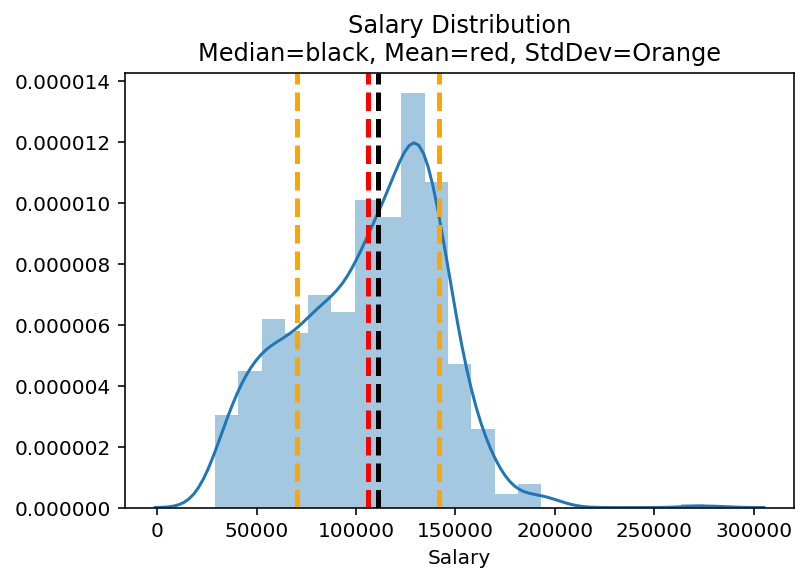


File have been saved as indeed_clean.csv
                                                    AverageSalary
Title                                                            
Accounting Data Analyst                                       0.0
Reporting/Data Analyst                                        0.0
Jr. Business Data Analyst                                     0.0
Jr. Data Analyst / Chatsworth                                 0.0
OSSE: Management Analyst (Data Analyst)                       0.0
Program Data Analyst                                          0.0
Program Data Analyst (Data Quality)                           0.0
Program Data Analyst (MS Excel Database Managem...            0.0
R&D Center Data Analyst                                       0.0
Research Data Analyst                                         0.0
Title     Associate Data Scientist
Salary           $65 - $75 an hour
Name: 999, dtype: object
this highest record originated from hourly rate
                       

In [27]:
# Computing average salary from the range
# Plot the distribution 
# Visualised the distribution withmean/median/standard deviation 
# Creating categorial columns
#
# input file  :  indeed_clean.csv
# output file :  indeed_clean.csv

%run eda_salary.py

##################################################################
# Review
# Looking at the total range of salaries, the average salary is somewhere
# from $32,240 to $275,000 on an annual basis, 
# with the most frequently occurring salaries in the realm of $108,000.
# The mean and median were not far apart.
# The orange dash lines were the standard deviation

proj_lib.jupyterlink('eda_salary.py')
proj_lib.jupyterlink('indeed_clean.csv')

### Qestion 1 Part 2 -  Salary Prediction

<a id='feng'></a>
<img src="https://d3fa68hw0m2vcc.cloudfront.net/470/185747567.jpeg" style="float: left; margin: 50px; height: 200px">

### Features Engineering

- [Top Section](#top)
- [Web Scraping](#web)
- [Data Loading](#dataload)
- [EDA](#eda)
- [Features Engineering](#feng)
- [Model Preparation](#prep)
- [Modeling Process](#model)
- [Salary Extrapolation](#extrapolate)
<br><br>
- [Question 2](#qn2)
<br>

In [28]:
# This section helps to identify features that predicts salary
# It loads the processed datafile with average salary defined.
# Use it the run a few different model to find features columns
#

%run feat_eng.py

# Columns   Classifier Used:
#   Company   Random Forest 
#   City      Random Forest 
#   Summary   Count Vectorizer

proj_lib.jupyterlink('feat_eng.py')
proj_lib.jupyterlink('indeed_clean.csv')

Using Count Vectorizer Classifier to explorer Summary
Using Random Forest Classifier to explorer Company


Using Random Forest Classifier to explorer City
Accuracy = 0.5921052631578947, features-counts for City
Adding more feature columns for City
[7.06290737e-05 2.69047417e-04 5.00918766e-05 ... 1.25546067e-04
 2.29172896e-04 2.32160543e-05]
Accuracy = 0.6644736842105263, features-counts for Summary
Adding more feature columns for Summary
Accuracy = 0.6118421052631579, features-counts for Company
Adding more feature columns for Company
       City   Summary   Company
0  0.610390  0.597403  0.558442
1  0.532468  0.545455  0.545455
2  0.558442  0.584416  0.623377
3  0.578947  0.500000  0.565789
4  0.539474  0.605263  0.565789
5  0.592105  0.723684  0.526316
6  0.539474  0.789474  0.592105
7  0.653333  0.786667  0.600000
8  0.666667  0.840000  0.613333
9  0.626667  0.573333  0.573333
updated datafile with extra columns
Click below to view/edit the file::
http://localhost:8888/edit/Docume

<a id='prep'></a>
<img src="https://www.researchgate.net/profile/Sladjana_Jankovic/publication/324596564/figure/fig2/AS:621608016306176@1525214308210/Schema-on-read-modeling-approach-in-Big-Data-integration-lifecycle.png
" style="float: left; margin: 50px; height: 200px">

### Model Preparation

- [Top Section](#top)
- [Web Scraping](#web)
- [Data Loading](#dataload)
- [EDA](#eda)
- [Features Engineering](#feng)
- [Model Preparation](#prep)
- [Modeling Process](#model)
- [Salary Extrapolation](#extrapolate)
<br><br>
- [Question 2](#qn2)
<br>

In [29]:
# This section defines the target and features
# and preparing for train and test data based on known salary data.
# StandardScaler is used to standardize them
# 
# 760 records has salary range, to create train test hold out data 
# planning
# first 600 for model training/test , last 160 for holdour
#
#
# Next thing : Regularization of models
# input files  :  indeed_clean.csv
#
%run model_prep.py
#
# We have hold out data of 160 records
# We have only 85% of data having no salary information.
#
# Need to look at other approach. Bootstrapping of data is needed.
#
# Next thing, RandomForestRegressor and DecisionTreeRegressor

proj_lib.jupyterlink('model_prep.py')
proj_lib.jupyterlink('indeed_clean.csv')

# Lasso has the best R2 score  0.696630

preparing data for regularization
list of features for regularization process:
 ['Higher_Salary', 'City_RichmondVA', 'City_LincolnNE', 'City_TampaFL', 'City_AnnArborMI', 'City_NewYorkNY', 'City_SaltLakeCityUT', 'City_SanFranciscoCA', 'City_PhoenixAZ', 'City_SeattleWA', 'City_WashingtonDC', 'Summary_analyst', 'Summary_architect', 'Summary_data', 'Summary_intelligence', 'Summary_business', 'Summary_engineer', 'Summary_analysis', 'Summary_big', 'Summary_research', 'Summary_architecture', 'Company_WiproLTD', 'Company_CreditAcceptance', 'Company_UniversityofUtah', 'Company_RallyHealth', 'Company_LosAngelesHomelessServicesAuthority', 'Company_KingCounty', 'Company_LogicRule', 'Company_USDepartmentofJustice', 'Company_AbbottLaboratories', 'Company_CapitalOne']
data preparation done, ready for regularization
        Model  mean score  accurary          RMSE           RSS
1       Lasso    0.662826  0.696630  19926.379830  5.955909e+10
0       Ridge    0.642740  0.681756  20408.998407  6.247908e

<a id='model'></a>
<img src="https://www.mathworks.com/help/stats/machinelearningtypes.jpg" style="float: left; margin: 80px; height: 200px">

### Modeling Process

- [Top Section](#top)
- [Web Scraping](#web)
- [Data Loading](#dataload)
- [EDA](#eda)
- [Features Engineering](#feng)
- [Model Preparation](#prep)
- [Modeling Process](#model)
- [Salary Extrapolation](#extrapolate)
<br><br>
- [Question 2](#qn2)

In [30]:
# This section load the data file with categorial columns
# Use it the run a few different model to predict the average Salary
# Models selected :  MinMaxScaler, StackingEstimator
#                    RandomForestRegressor,  DecisionTreeRegressor 
# with pipeline
# Approach 
#   Bagging and Random Forest Ensemble Algorithms, bootstrapping
# input file  :  indeed_clean.csv
# 

%run model_salary.py 

#
# Observation
# R2 score 0.6896 lower than Lasso

proj_lib.jupyterlink('model_salary.py')
proj_lib.jupyterlink('indeed_clean.csv')


Summary
mse        : 510927093.3887
rmse       : 22603.6965
mean score : 0.6134
mae        : 17188.7057
r2 score   : 0.6134
Click below to view/edit the file::
http://localhost:8888/edit/Documents/GitHub/materials/projects/project-4/model_salary.py
Click below to view/edit the file::
http://localhost:8888/edit/Documents/GitHub/materials/projects/project-4/indeed_clean.csv


<a id='validate'></a>
<img src="https://images.techhive.com/images/article/2016/12/04-complete-linear-regression-experiment-100697748-medium.jpg" style="float: left; margin: 50px; height: 200px">

### Model Validation and Conclusion

- [Top Section](#top)
- [Web Scraping](#web)
- [Data Loading](#dataload)
- [EDA](#eda)
- [Features Engineering](#feng)
- [Model Preparation](#prep)
- [Modeling Process](#model)
- [Salary Extrapolation](#extrapolate)


Possible for validation with hold out test ? Why & How ?
Conclusion and observation.



In [31]:
# Last steps, the model validation on both Ridge and new model
# List of the model score and compare
# input file  :  indeed_salaries.csv
# 

%run model_valdiation.py 

# Conclusion
# The new model pipeline with  StackingEstimator, RandomForestRegressor
# and DecisionTreeRegressor at optimal has the best R2 score 0.7191

proj_lib.jupyterlink('model_valdiation.py')
proj_lib.jupyterlink('indeed_clean.csv')

Model Lasso :
mse        : 283959832.9516
rmse       : 16851.1078
mean score : 0.4551
mae        : 12886.4128
r2 score   : 0.4551

Model Pipeline :
mse        : 250450451.2967
rmse       : 15825.6264
mean score : 0.5194
mae        : 11955.3911
r2 score   : 0.5194
Click below to view/edit the file::
http://localhost:8888/edit/Documents/GitHub/materials/projects/project-4/model_valdiation.py
Click below to view/edit the file::
http://localhost:8888/edit/Documents/GitHub/materials/projects/project-4/indeed_clean.csv


<a id='extrapolate'></a>
<img src="https://stepupanalytics.com/wp-content/uploads/2018/08/Random_forest_arka.gif" style="float: left; margin: 50px; height: 200px">

### Question 1 Part 3 -  Salary Extrapolation

- [Top Section](#top)
- [Web Scraping](#web)
- [Data Loading](#dataload)
- [EDA](#eda)
- [Features Engineering](#feng)
- [Model Preparation](#prep)
- [Modeling Process](#model)
- [Salary Extrapolation](#extrapolate)
<br><br>
- [Question 2](#qn2)

In [32]:
# This section predicts the average salary and the Higher_Salary indicator
# This time , we load the entire dateset of 4980 rows
# 4220 rows has no Salary range information in the first place.
# 

%run salary_pred.py 

proj_lib.jupyterlink('salary_pred.py')
proj_lib.jupyterlink('indeed_clean.csv')


File have been saved as indeed_clean.csv
average salary per job category
Category
A    73608.265306
B    71518.962513
C    72094.870108
D    75992.276186
E    92725.950157
         ...     
J    71240.318168
K    73417.125091
L    70866.588772
M    76044.746034
N    73880.983105
Name: AverageSalary, Length: 14, dtype: float64
                                                  Title  AverageSalary  \
1334                        Machine Learning Evangelist   70354.176783   
2532                  Sr. Business Intelligence Manager   70559.530741   
2780                  Intelligence Analyst (Government)   72549.685626   
2282       Applications Scientist/Engineer - New Mexico   72549.685626   
4989                            IoT Solutions Architect   70866.588772   
...                                                 ...            ...   
4751  Sr. Specialist Solutions Architect, Big Data (...   78366.392697   
4030                     A&R Research Analyst Assistant   72360.922997   
3208 

<a id='qn2'></a>
### Question 2 - Job Category

- [Top Section](#top)
<br><br>
  Question 2
- [MLP](#mlp)
- [KMean](#kmean)
<br>
    
This section does the classification of job category

   [Classification of job category using MLPClasifier](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

<a id='mlp'></a>
<img src="https://cdn-images-1.medium.com/max/720/1*gFr5bUiL2LzWFpKYTQ_c6Q.png" style="float: left; margin: 50px; height: 200px">
<br>
### Multi-layer Perceptron (MLP) model
- [Top Section](#top)

In [35]:
# This section uses MLPClassifier to classify job category
# It reads from the same datafile to perform learning
# The final model returns a matrix point to the index of 
# the jobclass dictionary

%run mpclass.py 

proj_lib.jupyterlink('mpclass.py')

{'A': 'Data Scientist, Machine Learning', 'B': 'BI, Business Intelligent, Data Warehousing', 'C': 'Analyst', 'D': 'Engineer', 'E': 'Solution Architect', 'F': 'Python Developer', 'G': 'Consultant, Manager, Chief', 'H': 'Lecturer', 'I': 'Data', 'J': 'Specialist', 'K': 'Research', 'L': 'Oracle', 'M': 'Contract', 'N': 'Intern'}
(4980, 31) (3735, 31) (1245, 31) (4980,) (3735,) (1245,)
Iteration 1, loss = 2.36557705
Iteration 2, loss = 2.14834766
Iteration 3, loss = 1.92212086
Iteration 4, loss = 1.74138211
Iteration 5, loss = 1.63898602
Iteration 6, loss = 1.59367619
Iteration 7, loss = 1.56779168
Iteration 8, loss = 1.54662421
Iteration 9, loss = 1.52845033
Iteration 10, loss = 1.51217004
Iteration 11, loss = 1.49815005
Iteration 12, loss = 1.48568562
Iteration 13, loss = 1.47487643
Iteration 14, loss = 1.46576514
Iteration 15, loss = 1.45708486
Iteration 16, loss = 1.44999650
Iteration 17, loss = 1.44333354
Iteration 18, loss = 1.43752390
Iteration 19, loss = 1.43245914
Iteration 20, loss

Iteration 488, loss = 1.27618378
Iteration 489, loss = 1.27625057
Iteration 490, loss = 1.27614552
Iteration 491, loss = 1.27635707
Iteration 492, loss = 1.27630743
Iteration 493, loss = 1.27618093
Iteration 494, loss = 1.27604368
Iteration 495, loss = 1.27619294
Iteration 496, loss = 1.27596819
Iteration 497, loss = 1.27551117
Iteration 498, loss = 1.27549380
Iteration 499, loss = 1.27573015
Iteration 500, loss = 1.27557256
(1245,)
0.6441767068273092
[[  0   0   0   0   0   0   0  10   0   0   0   0]
 [  0   0  10   0   0   0   0  13   0   0   0   0]
 [  0   0  66   0   0   0   0  92   0   0   0   0]
 [  0   0   3   0   0   0   0  54   0   0   0   0]
 [  0   0   2   0   0   0   0  45   0   0   0   0]
 [  0   0  14   0   0   0   0  25   0   0   0   0]
 [  0   0   7   0   0   0   0   6   0   0   0   0]
 [  0   0  24   0   0   0   0 736   0   0   0   0]
 [  0   0   3   0   0   0   0   8   0   0   0   0]
 [  0   0   0   0   0   0   0  23   0   0   0   0]
 [  0   0   1   0   0   0   0   2 

<a id='kmean'></a>
<img src="https://www.saedsayad.com/images/Clustering_kmeans_c.png" style="float: left; margin: 50px; height: 150px">
<br>
### Using KMean Clustering on Job category
- [Top Section](#top)

In [34]:
# This section uses KMean Classifier to classify job category
# It reads from the same datafile to perform learning
# The final model returns a matrix point to the index of 
# the jobclass dictionary

%run kmean.py 

proj_lib.jupyterlink('kmean.py')

{'A': 'Data Scientist, Machine Learning', 'B': 'BI, Business Intelligent, Data Warehousing', 'C': 'Analyst', 'D': 'Engineer', 'E': 'Solution Architect', 'F': 'Python Developer', 'G': 'Consultant, Manager, Chief', 'H': 'Lecturer', 'I': 'Data', 'J': 'Specialist', 'K': 'Research', 'L': 'Oracle', 'M': 'Contract', 'N': 'Intern'}
(4980, 31) (3735, 31) (1245, 31) (4980,) (3735,) (1245,)
14
[1 7 1 ... 1 5 1]
0.44154146658100174
0.5226833215907595
4980 (4980, 31) (4980,)
job category #200 type=A - Data Scientist, Machine Learning
job category #201 type=D - Engineer
job category #202 type=F - Python Developer
job category #203 type=I - Data
job category #204 type=A - Data Scientist, Machine Learning
job category #205 type=D - Engineer
job category #206 type=A - Data Scientist, Machine Learning
job category #207 type=E - Solution Architect
job category #208 type=A - Data Scientist, Machine Learning
job category #209 type=D - Engineer
Click below to view/edit the file::
http://localhost:8888/edit/